# Import essential libraries

In [27]:
import matplotlib.pyplot as plt  
import seaborn as sns     
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler      
from sklearn.impute import SimpleImputer

In [28]:
df = pd.read_csv('/kaggle/input/stock-price/question4-stock-data.csv')
df.tail()

,Unnamed: 0,Date,Adj Close,Close,High,Low,Open,Volume
11286,11286,2024-12-20,178.169998,178.169998,179.919998,175.839996,175.839996,425700.0
11287,11287,2024-12-23,180.449997,180.449997,180.619995,177.970001,179.119995,422700.0
11288,11288,2024-12-24,181.429993,181.429993,181.720001,180.830002,181.000000,168600.0
11289,11289,2024-12-26,197.360001,197.360001,198.000000,193.130005,195.970001,1281200.0
11290,11290,2024-12-27,199.520004,199.520004,201.000000,198.179993,200.360001,779500.0


In [29]:
df.tail()

,Unnamed: 0,Date,Adj Close,Close,High,Low,Open,Volume
11286,11286,2024-12-20,178.169998,178.169998,179.919998,175.839996,175.839996,425700.0
11287,11287,2024-12-23,180.449997,180.449997,180.619995,177.970001,179.119995,422700.0
11288,11288,2024-12-24,181.429993,181.429993,181.720001,180.830002,181.000000,168600.0
11289,11289,2024-12-26,197.360001,197.360001,198.000000,193.130005,195.970001,1281200.0
11290,11290,2024-12-27,199.520004,199.520004,201.000000,198.179993,200.360001,779500.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11291 entries, 0 to 11290
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11291 non-null  int64  
 1   Date        11181 non-null  object 
 2   Adj Close   11198 non-null  float64
 3   Close       11174 non-null  float64
 4   High        11196 non-null  float64
 5   Low         11164 non-null  float64
 6   Open        11188 non-null  float64
 7   Volume      11146 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 705.8+ KB


In [33]:
df.describe()

,Unnamed: 0,Date,Adj Close,Close,High,Low,Open,Volume
count,11291.000000,11181,11198.000000,11174.000000,11196.000000,11164.000000,11188.000000,1.114600e+04
mean,5645.000000,2002-08-03 13:57:54.429836416,63.609130,72.026945,72.503100,71.665079,67.999259,2.144157e+05
min,0.000000,1980-03-17 00:00:00,2.259452,3.237711,3.237711,3.237711,0.000000,0.000000e+00
25%,2822.500000,1991-05-17 00:00:00,19.224636,27.500000,27.789255,27.536156,0.000000,1.350000e+04
50%,5645.000000,2002-07-26 00:00:00,50.608900,66.035000,66.724998,65.418751,66.065002,9.032350e+04
75%,8467.500000,2013-10-21 00:00:00,104.723621,114.297503,114.892500,113.639999,114.269997,2.915750e+05
max,11290.000000,2024-12-27 00:00:00,254.770004,254.770004,255.229996,253.589996,255.000000,1.858270e+07
std,3259.575279,NaN,52.266247,51.259828,51.550735,51.011632,55.834401,3.883662e+05


In [36]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values('Date')

In [37]:
df = df.drop(df.columns[0], axis=1)

In [38]:
df.set_index('Date', inplace=True)

In [39]:
print(df.columns)

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [40]:
print(df.head())

            Adj Close     Close      High       Low      Open   Volume
Date                                                                  
1980-03-17   2.296798  3.291227  3.344743  3.291227  0.000000  41109.0
1980-03-18   2.306134  3.304606  3.358122  3.304606  0.000000   9343.0
1980-03-19   2.306134  3.304606  3.304606  3.304606  3.304606      0.0
1980-03-20   2.306134  3.304606  3.358122  3.304606  0.000000  10277.0
1980-03-21   2.362154  3.384880  3.438396  3.384880  0.000000   8409.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11291 entries, 1980-03-17 to NaT
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  11198 non-null  float64
 1   Close      11174 non-null  float64
 2   High       11196 non-null  float64
 3   Low        11164 non-null  float64
 4   Open       11188 non-null  float64
 5   Volume     11146 non-null  float64
dtypes: float64(6)
memory usage: 617.5 KB


In [42]:
df.tail()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
NaT,116.889999,116.889999,117.349998,116.110001,116.199997,179100.0
NaT,158.270004,158.270004,161.619995,158.169998,160.740005,355800.0
NaT,143.190002,143.190002,144.800003,142.649994,144.759995,223400.0
NaT,178.449997,178.449997,179.679993,177.259995,179.000000,638000.0
NaT,175.830002,175.830002,176.559998,175.169998,175.869995,347900.0


# Check missing values

In [43]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Adj Close     93
Close        117
High          95
Low          127
Open         103
Volume       145
dtype: int64


In [44]:
trading_days = pd.date_range(start=df.index.min(), end=df.index.max(), freq='B')
missing_days = trading_days[~trading_days.isin(df.index)]
print(f"Missing Trading Days: {len(missing_days)}")

Missing Trading Days: 504


In [45]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,11198.000000,11174.000000,11196.000000,11164.000000,11188.000000,1.114600e+04
mean,63.609130,72.026945,72.503100,71.665079,67.999259,2.144157e+05
std,52.266247,51.259828,51.550735,51.011632,55.834401,3.883662e+05
min,2.259452,3.237711,3.237711,3.237711,0.000000,0.000000e+00
25%,19.224636,27.500000,27.789255,27.536156,0.000000,1.350000e+04
50%,50.608900,66.035000,66.724998,65.418751,66.065002,9.032350e+04
75%,104.723621,114.297503,114.892500,113.639999,114.269997,2.915750e+05
max,254.770004,254.770004,255.229996,253.589996,255.000000,1.858270e+07


In [46]:
trading_days

DatetimeIndex(['1980-03-17', '1980-03-18', '1980-03-19', '1980-03-20',
               '1980-03-21', '1980-03-24', '1980-03-25', '1980-03-26',
               '1980-03-27', '1980-03-28',
               ...
               '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19',
               '2024-12-20', '2024-12-23', '2024-12-24', '2024-12-25',
               '2024-12-26', '2024-12-27'],
              dtype='datetime64[ns]', length=11685, freq='B')

# missing values handling

In [47]:
df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109.0
1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343.0
1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0.0
1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277.0
1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409.0


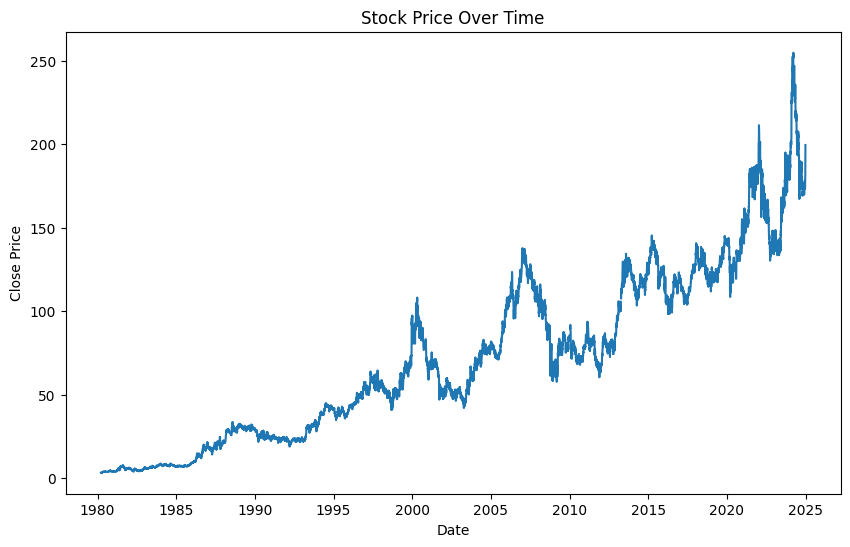

In [48]:
plt.figure(figsize=(10,6))
plt.plot( df['Close'])
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

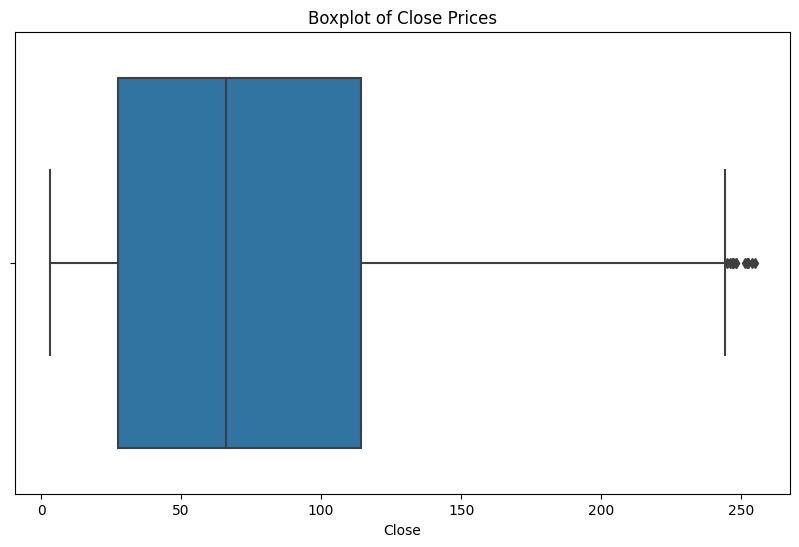

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Close'])
plt.title('Boxplot of Close Prices')
plt.show()

## Heatmap for missing values

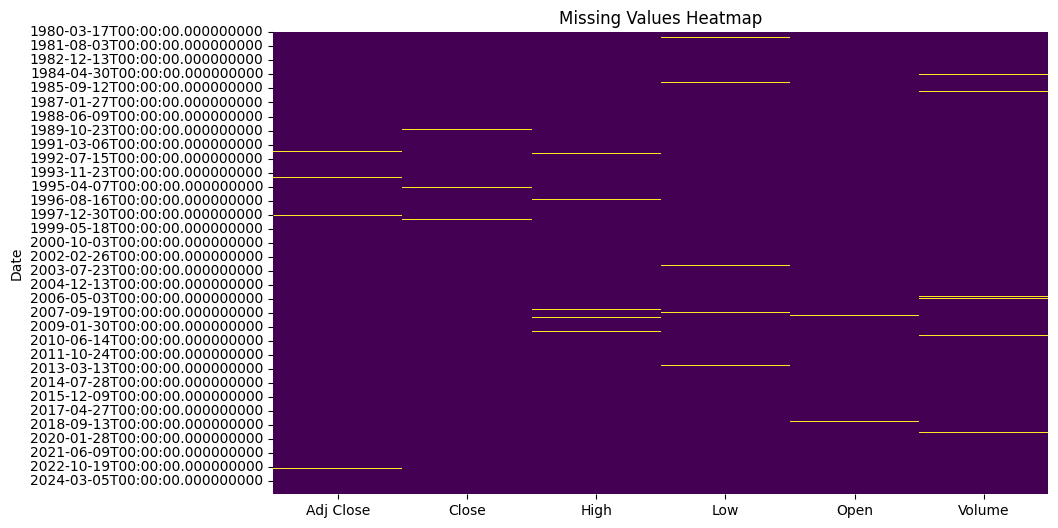

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [51]:
missing_dates = df[df.index.isna()]
missing_dates

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
NaT,2.617510,3.750795,3.792939,3.750795,0.000000,38262.0
NaT,3.195910,4.579622,4.607718,4.579622,0.000000,8898.0
NaT,2.784167,3.989610,4.003658,3.989610,0.000000,4449.0
NaT,3.921361,5.619169,5.661312,5.619169,0.000000,20466.0
NaT,3.882148,5.562977,5.605121,5.562977,0.000000,14237.0
...,...,...,...,...,...,...
NaT,116.889999,116.889999,117.349998,116.110001,116.199997,179100.0
NaT,158.270004,158.270004,161.619995,158.169998,160.740005,355800.0
NaT,143.190002,143.190002,144.800003,142.649994,144.759995,223400.0


In [52]:
print("Missing Dates in Index:", df.index.isnull().sum())
df = df[df.index.notnull()]
print("Shape after dropping missing Date rows:", df.shape)
print("Missing Values in columns after dropping Date:\n", df.isnull().sum())

Missing Dates in Index: 110
Shape after dropping missing Date rows: (11181, 6)
Missing Values in columns after dropping Date:
 Adj Close     93
Close        116
High          95
Low          126
Open         100
Volume       145
dtype: int64


In [54]:
price_cols = ['Close', 'Adj Close', 'High', 'Low', 'Open']
df[price_cols] = df[price_cols].ffill()

## Interpolate Volume

In [55]:
df['Volume'] = df['Volume'].interpolate(method='linear')

## Handle any remaining NaN

In [57]:
df.bfill(inplace=True)  # Back-fill if needed
print("Missing Values after filling:\n", df.isnull().sum())

Missing Values after filling:
 Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


# Visualizations

### Aspects to Analyze
1. Time Series Analysis of Close Price
Trend Evaluation: Examine the overall trend (e.g., growth trajectory over 44 years).
Anomaly Detection: Identify significant irregularities (e.g., market crashes in 1987, 2008).
2. Seasonality Assessment
Periodic Patterns: Investigate monthly or weekly patterns in Close price (e.g., end-of-month effects).
Decomposition: Apply time series decomposition (trend, seasonal, residual) if necessary.
3. Volatility and Trading Volume
Daily Range: Plot High - Low to measure volatility and assess trading activity.
Volume Trends: Analyze Volume alongside volatility and its correlation with Close price changes.
4. Impact of Missing Trading Days
Gap Visualization: Highlight gaps (e.g., 504 missing days) to evaluate their significance.
Handling Strategy: Determine if interpolation or filling is required.
5. Feature Relationships
Correlation Analysis: Compute a correlation matrix (e.g., Close vs. Open, Volume).
Lag Effects: Create lag plots (e.g., Close vs. Close from 5 days prior) to explore temporal dependencies.

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Set plot style (updated to avoid deprecation warning)
plt.style.use('seaborn-v0_8')



## 1. Time Series Plot of Close

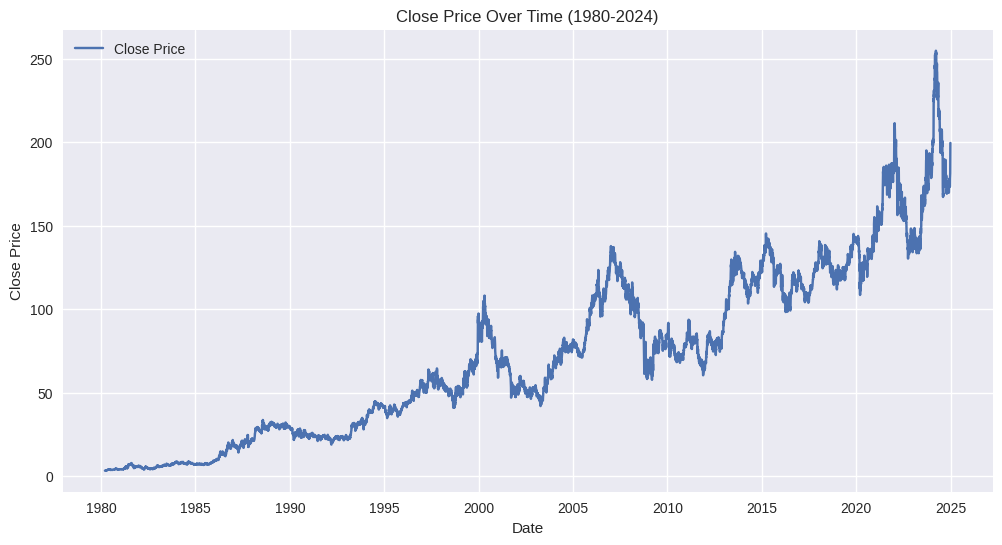

In [61]:

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('Close Price Over Time (1980-2024)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## 2. Zoomed-In Plot (Recent 5 Years)

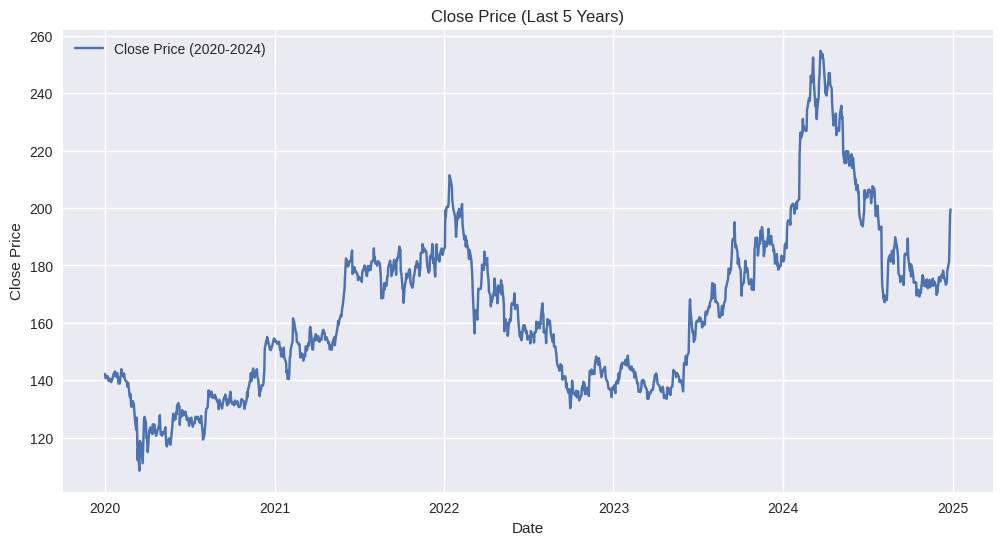

In [62]:
recent = df[df.index >= '2020-01-01']
plt.figure(figsize=(12, 6))
plt.plot(recent.index, recent['Close'], label='Close Price (2020-2024)')
plt.title('Close Price (Last 5 Years)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## 3. Seasonality Decomposition (Yearly)

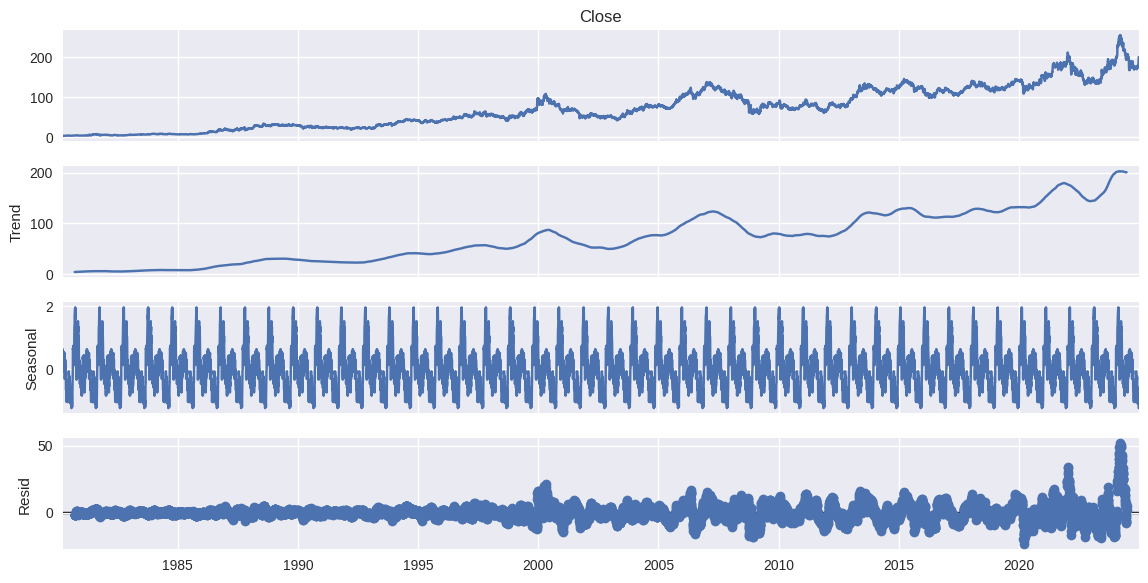

In [63]:
decomp = seasonal_decompose(df['Close'], model='additive', period=252)  # ~1 trading year
fig = decomp.plot()
fig.set_size_inches(12, 6)
plt.show()

## 4. Volatility (High - Low) and Volume

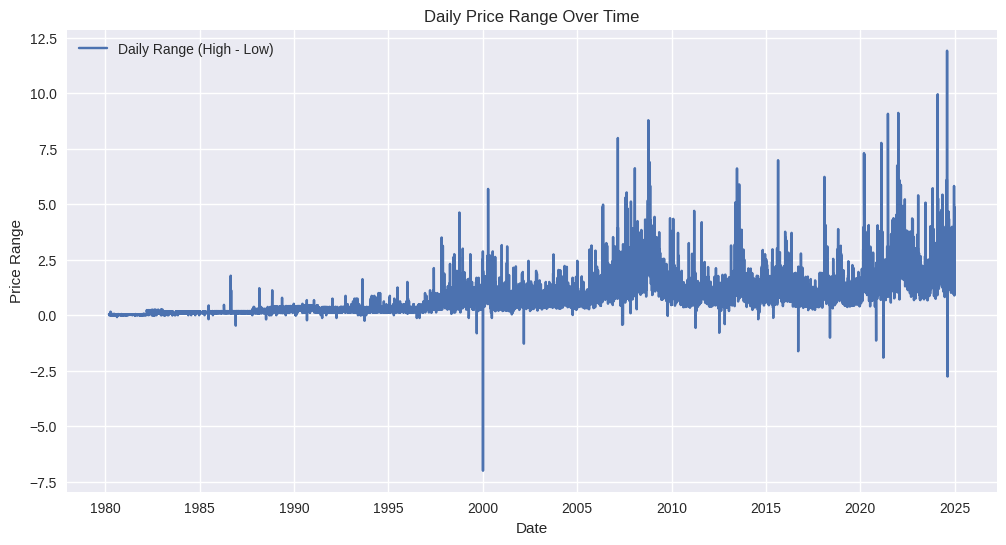

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['High'] - df['Low'], label='Daily Range (High - Low)')
plt.title('Daily Price Range Over Time')
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.legend()
plt.show()

## 5. Correlation Matrix

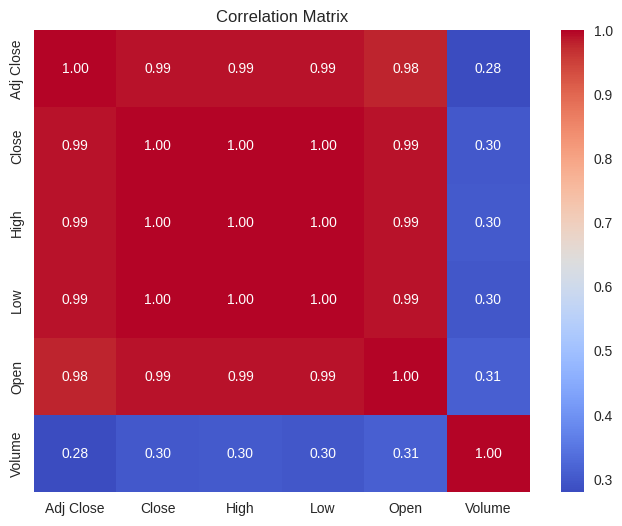

In [72]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## 6. Lag Plot (Close vs. 5-day lag)

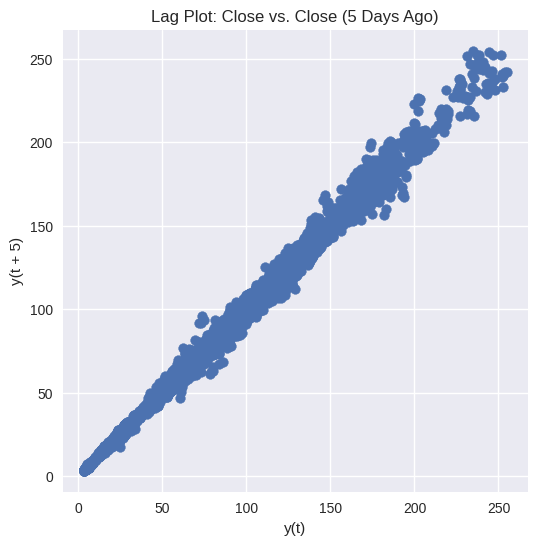

In [73]:
plt.figure(figsize=(6, 6))
pd.plotting.lag_plot(df['Close'], lag=5)
plt.title('Lag Plot: Close vs. Close (5 Days Ago)')
plt.show()

## Identify problematic rows

In [75]:
problematic = df[df['High'] < df['Low']]
print("Rows with High < Low:\n", problematic)

Rows with High < Low:
 Empty DataFrame
Columns: [Adj Close, Close, High, Low, Open, Volume]
Index: []


# Suggested fix: Swap values

In [76]:
df.loc[df['High'] < df['Low'], ['High', 'Low']] = df.loc[df['High'] < df['Low'], ['Low', 'High']].values
print("Fixed rows check:\n", df[df.index.isin(problematic.index)][['High', 'Low']])

Fixed rows check:
 Empty DataFrame
Columns: [High, Low]
Index: []


## corrected price high low graph

### Volatility (High - Low) and Volume

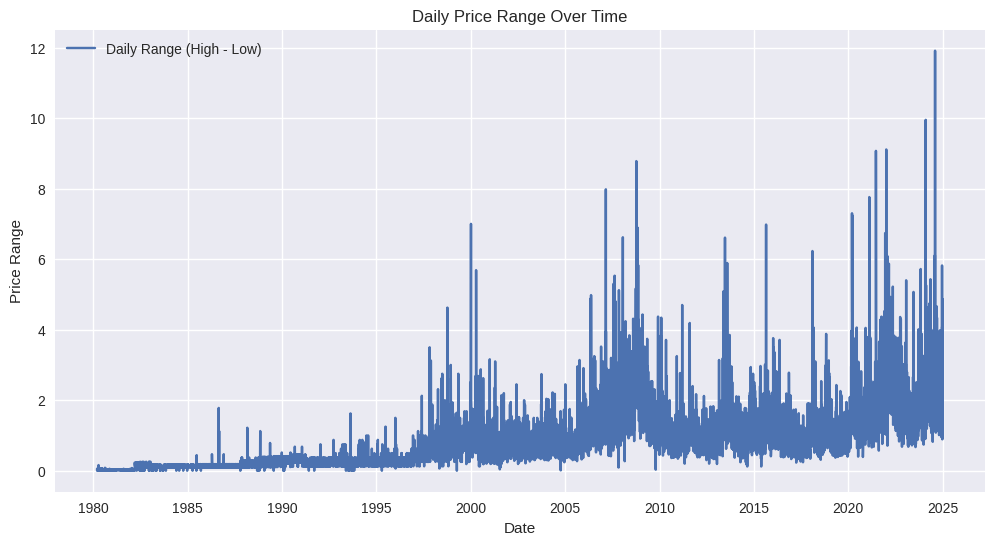

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['High'] - df['Low'], label='Daily Range (High - Low)')
plt.title('Daily Price Range Over Time')
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.legend()
plt.show()

### Monthly Averages
#### Purpose: Smooths noise, reveals seasonal trends.

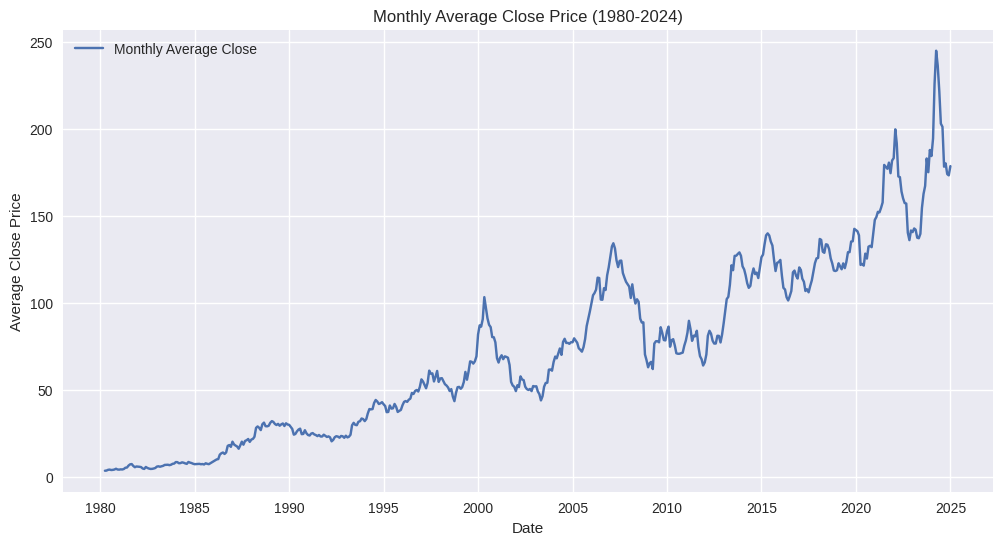

In [78]:
# Resample to monthly average using 'ME' (Month End)
df_monthly = df['Close'].resample('ME').mean()

# Plot the monthly average
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly, label='Monthly Average Close')
plt.title('Monthly Average Close Price (1980-2024)')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.legend()
plt.show()

### Rolling Statistics
#### Purpose: Captures short-term trends and volatility.

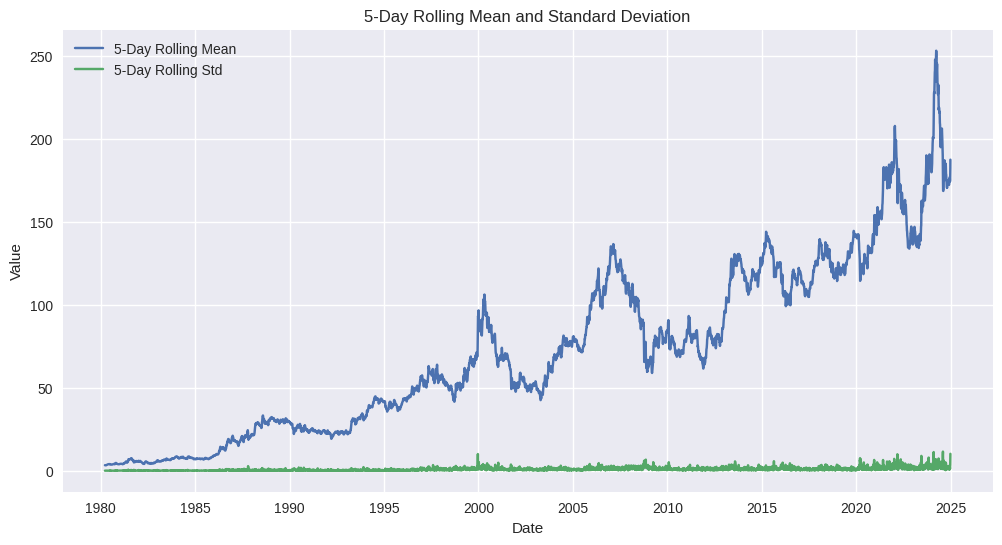

In [79]:
df['Rolling_Mean_5'] = df['Close'].rolling(window=5).mean()
df['Rolling_Std_5'] = df['Close'].rolling(window=5).std()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Rolling_Mean_5'], label='5-Day Rolling Mean')
plt.plot(df.index, df['Rolling_Std_5'], label='5-Day Rolling Std')
plt.title('5-Day Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

##### 1. Lagged Close Prices (1-5 days)

In [81]:
for lag in range(1, 6):
    df[f'Lag_{lag}'] = df['Close'].shift(lag)

##### 2. Rolling Mean and Standard Deviation (5-day window)

In [82]:
df['Rolling_Mean_5'] = df['Close'].rolling(window=5, min_periods=1).mean()
df['Rolling_Std_5'] = df['Close'].rolling(window=5, min_periods=1).std()

##### 3. Volume Features (Current and 5-day Change) - Handle inf

In [83]:
df['Volume_Change_5'] = df['Volume'].pct_change(periods=5).replace([np.inf, -np.inf], 0).fillna(0)

##### 4. Day of Week (as categorical)

In [86]:
df['Day_of_Week'] = df.index.dayofweek  # 0 = Monday, 6 = Sunday

##### 5. Binary Crash Indicator
##### Fit a simple trend (e.g., linear) and calculate residuals

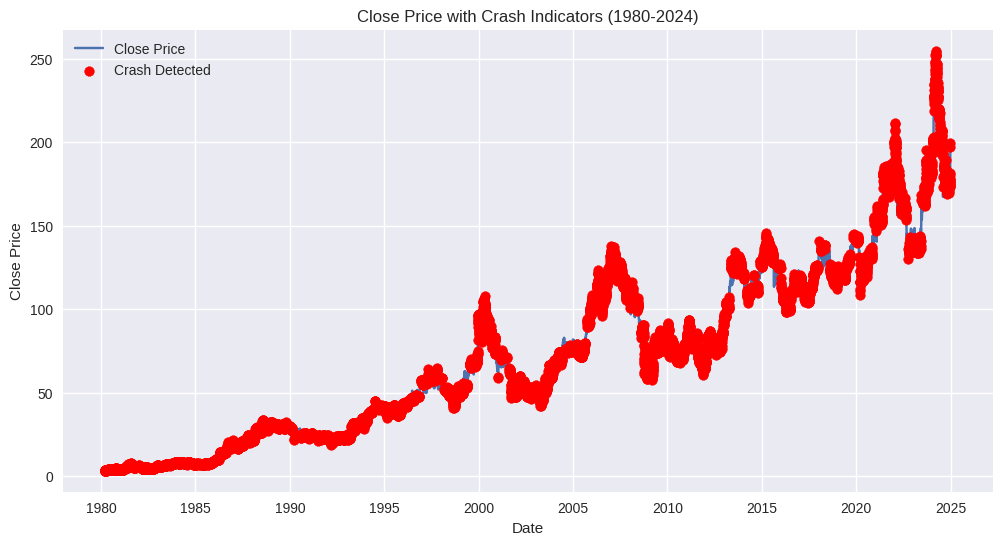

NaN in Close: 0
NaN in Residual: 0
NaN in Crash_Indicator: 0


In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined with a 'Close' column and a DatetimeIndex

# Ensure no NaN in 'Close' before fitting the trend
df['Close'] = df['Close'].ffill().bfill()

# Fit a linear trend
trend = np.polyfit(range(len(df)), df['Close'], 1)
trend_values = np.polyval(trend, range(len(df)))

# Calculate residuals
df['Residual'] = df['Close'] - trend_values

# Calculate rolling standard deviation, replacing NaN with 0
rolling_std = df['Residual'].rolling(window=30, min_periods=1).std().fillna(0)
threshold = 2 * rolling_std

# Create crash indicator
df['Crash_Indicator'] = (df['Residual'].abs() > threshold).astype(int)

# Plot to verify
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.scatter(df.index[df['Crash_Indicator'] == 1], df['Close'][df['Crash_Indicator'] == 1], 
            color='red', label='Crash Detected', zorder=5)
plt.title('Close Price with Crash Indicators (1980-2024)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Optional: Diagnose NaN issues
print("NaN in Close:", df['Close'].isna().sum())
print("NaN in Residual:", df['Residual'].isna().sum())
print("NaN in Crash_Indicator:", df['Crash_Indicator'].isna().sum())

In [92]:
# Drop rows with NaN values introduced by lagging or rolling
df = df.dropna()

# Display the first few rows with new features
print(df.head())

            Adj Close     Close      High       Low  Open   Volume  \
Date                                                                 
1980-03-24   2.371490  3.398259  3.451775  3.398259   0.0   2803.0   
1980-03-25   2.352816  3.371501  3.425017  3.371501   0.0  27095.0   
1980-03-26   2.352816  3.371501  3.425017  3.371501   0.0   1869.0   
1980-03-27   2.324807  3.331364  3.384880  3.331364   0.0  14015.0   
1980-03-28   2.315470  3.317985  3.371501  3.317985   0.0  36438.0   

            Rolling_Mean_5  Rolling_Std_5     Lag_1     Lag_2     Lag_3  \
Date                                                                      
1980-03-24        3.339391       0.047866  3.384880  3.304606  3.304606   
1980-03-25        3.352770       0.044974  3.398259  3.384880  3.304606   
1980-03-26        3.366149       0.036148  3.371501  3.398259  3.384880   
1980-03-27        3.371501       0.025030  3.371501  3.371501  3.398259   
1980-03-28        3.358122       0.032772  3.331364  3.3715

In [93]:
df.head()

,Adj Close,Close,High,Low,Open,Volume,Rolling_Mean_5,Rolling_Std_5,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Volume_Change_5,Day_of_Week,Residual,Crash_Indicator
Date,,,,,,,,,,,,,,,,,
1980-03-24,2.371490,3.398259,3.451775,3.398259,0.0,2803.0,3.339391,0.047866,3.384880,3.304606,3.304606,3.304606,3.291227,-0.931815,0,14.875760,1
1980-03-25,2.352816,3.371501,3.425017,3.371501,0.0,27095.0,3.352770,0.044974,3.398259,3.384880,3.304606,3.304606,3.304606,1.900032,1,14.834033,1
1980-03-26,2.352816,3.371501,3.425017,3.371501,0.0,1869.0,3.366149,0.036148,3.371501,3.398259,3.384880,3.304606,3.304606,0.000000,2,14.819063,1
1980-03-27,2.324807,3.331364,3.384880,3.331364,0.0,14015.0,3.371501,0.025030,3.371501,3.371501,3.398259,3.384880,3.304606,0.363725,3,14.763957,1
1980-03-28,2.315470,3.317985,3.371501,3.317985,0.0,36438.0,3.358122,0.032772,3.331364,3.371501,3.371501,3.398259,3.384880,3.333214,4,14.735609,1


# model selection

In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# # Prepare features and target
# features = ['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Rolling_Mean_5', 
#             'Rolling_Std_5', 'Volume_Change_5', 'Day_of_Week', 'Crash_Indicator']
# target = 'Close'

# # Shift target by 5 days for 5-day forecast
# df['Target'] = df[target].shift(-5)
# df = df.dropna()  # Drop rows where target is NaN

# # Split data (80% train, 20% test)
# train_size = int(len(df) * 0.8)
# train_data = df[:train_size]
# test_data = df[train_size:]

# X_train = train_data[features]
# y_train = train_data['Target']
# X_test = test_data[features]
# y_test = test_data['Target']

# # 1. ARIMA Model
# # Fit ARIMA on Close price (simplified, using only time series)
# model_arima = ARIMA(train_data['Close'], order=(5, 1, 0))  # (p,d,q) tuned manually
# fit_arima = model_arima.fit()
# arima_pred = fit_arima.forecast(steps=len(test_data))

# # 2. LSTM Model
# # Reshape data for LSTM [samples, timesteps, features]
# X_train_lstm = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
# X_test_lstm = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

# model_lstm = Sequential()
# model_lstm.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])))
# model_lstm.add(Dense(1))
# model_lstm.compile(optimizer='adam', loss='mse')
# model_lstm.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=0)
# lstm_pred = model_lstm.predict(X_test_lstm)

# # 3. XGBoost Model
# model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
# model_xgb.fit(X_train, y_train)
# xgb_pred = model_xgb.predict(X_test)

# # Evaluate Models
# def evaluate_model(y_true, y_pred, model_name):
#     rmse = np.sqrt(mean_squared_error(y_true, y_pred))
#     mae = mean_absolute_error(y_true, y_pred)
#     r2 = r2_score(y_true, y_pred)
#     print(f"{model_name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")
#     return rmse, mae, r2

# print("Model Performance:")
# evaluate_model(y_test, arima_pred, "ARIMA")
# evaluate_model(y_test, lstm_pred.flatten(), "LSTM")
# evaluate_model(y_test, xgb_pred, "XGBoost")

# # Plot Predictions vs Actual
# plt.figure(figsize=(12, 6))
# plt.plot(test_data.index, y_test, label='Actual')
# plt.plot(test_data.index, arima_pred, label='ARIMA')
# plt.plot(test_data.index, lstm_pred.flatten(), label='LSTM')
# plt.plot(test_data.index, xgb_pred, label='XGBoost')
# plt.title('5-Day Ahead Close Price Prediction')
# plt.xlabel('Date')
# plt.ylabel('Close Price ($)')
# plt.legend()
# plt.show()

# Improvements

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
# # Shift target by 5 days for 5-day forecast
# df['Target'] = df[target].shift(-5)
# df = df.dropna()  # Drop rows where target is NaN

# # Feature scaling
# scaler_X = StandardScaler()
# scaler_y = StandardScaler()
# X = scaler_X.fit_transform(df[features])
# y = scaler_y.fit_transform(df['Target'].values.reshape(-1, 1)).ravel()

# # Time-Series Cross-Validation
# tscv = TimeSeriesSplit(n_splits=5)
# rmse_scores = []
# mae_scores = []
# r2_scores = []

# # Hyperparameter grid (simplified for demonstration)
# param_grid = {
#     'units': [50, 100],
#     'dropout_rate': [0.2, 0.3],
#     'learning_rate': [0.01, 0.001],
#     'epochs': [20, 30],
#     'batch_size': [32, 64]
# }

# best_score = float('inf')
# best_params = {}

# for units in param_grid['units']:
#     for dropout_rate in param_grid['dropout_rate']:
#         for learning_rate in param_grid['learning_rate']:
#             for epochs in param_grid['epochs']:
#                 for batch_size in param_grid['batch_size']:
#                     print(f"Testing: units={units}, dropout={dropout_rate}, lr={learning_rate}, epochs={epochs}, batch={batch_size}")
#                     fold_rmse = []
#                     for train_index, test_index in tscv.split(X):
#                         X_train, X_test = X[train_index], X[test_index]
#                         y_train, y_test = y[train_index], y[test_index]

#                         # Reshape for LSTM [samples, timesteps, features]
#                         X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
#                         X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

#                         # Build and train LSTM model
#                         model = Sequential()
#                         model.add(LSTM(units=units, activation='relu', input_shape=(1, X_train.shape[1]), return_sequences=False))
#                         model.add(Dropout(dropout_rate))  # Add dropout for regularization
#                         model.add(Dense(1))
#                         model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
#                         model.fit(X_train_lstm, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

#                         # Predict and evaluate
#                         y_pred = model.predict(X_test_lstm, verbose=0)
#                         y_pred_inv = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()
#                         y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
#                         rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
#                         fold_rmse.append(rmse)

#                     avg_rmse = np.mean(fold_rmse)
#                     if avg_rmse < best_score:
#                         best_score = avg_rmse
#                         best_params = {'units': units, 'dropout_rate': dropout_rate, 'learning_rate': learning_rate, 
#                                        'epochs': epochs, 'batch_size': batch_size}
#                     rmse_scores.append(avg_rmse)
#                     print(f"Average RMSE for this config: {avg_rmse:.2f}")

# print(f"Best Parameters: {best_params}")
# print(f"Best Average RMSE: {best_score:.2f}")

# # Train final model with best parameters on full dataset
# final_train_size = int(len(df) * 0.8)
# X_train = X[:final_train_size]
# X_test = X[final_train_size:]
# y_train = y[:final_train_size]
# y_test = y[final_train_size:]

# X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
# X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# final_model = Sequential()
# final_model.add(LSTM(units=best_params['units'], activation='relu', input_shape=(1, X_train.shape[1])))
# final_model.add(Dropout(best_params['dropout_rate']))
# final_model.add(Dense(1))
# final_model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), loss='mse')
# final_model.fit(X_train_lstm, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

# # Final prediction and evaluation
# final_pred = final_model.predict(X_test_lstm, verbose=0)
# final_pred_inv = scaler_y.inverse_transform(final_pred.reshape(-1, 1)).ravel()
# y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

# rmse = np.sqrt(mean_squared_error(y_test_inv, final_pred_inv))
# mae = mean_absolute_error(y_test_inv, final_pred_inv)
# r2 = r2_score(y_test_inv, final_pred_inv)
# print(f"Final Model Performance - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

# # Plot Predictions vs Actual
# plt.figure(figsize=(12, 6))
# plt.plot(df.index[final_train_size:], y_test_inv, label='Actual')
# plt.plot(df.index[final_train_size:], final_pred_inv, label='Predicted')
# plt.title('Improved LSTM 5-Day Ahead Close Price Prediction')
# plt.xlabel('Date')
# plt.ylabel('Close Price ($)')
# plt.legend()
# plt.show()

In [96]:
last_date = df.index[-1]
last_date

Timestamp('2024-12-27 00:00:00')

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Assuming df is already defined with required features and 'Close' column

# Prepare features and target for scaling
features = ['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Rolling_Mean_5', 
            'Rolling_Std_5', 'Volume_Change_5', 'Day_of_Week', 'Crash_Indicator']
target = 'Close'

# Feature scaling (fit on entire data for consistency)
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(df[features])
y = scaler_y.fit_transform(df[target].values.reshape(-1, 1)).ravel()

# Train-test split
final_train_size = int(len(df) * 0.8)
X_train = X[:final_train_size]
y_train = y[:final_train_size]

X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

# Define the final LSTM model with Input layer
final_model = Sequential()
final_model.add(Input(shape=(1, X_train.shape[1])))  # Define input shape here
final_model.add(LSTM(units=100, activation='relu'))
final_model.add(Dropout(0.2))
final_model.add(Dense(1))
final_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
final_model.fit(X_train_lstm, y_train, epochs=30, batch_size=64, verbose=1)

# Prepare data for prediction (last 5 days up to Dec 27, 2024)
last_date = df.index[-1]  # December 27, 2024
last_data = df.iloc[-5:]  # Last 5 rows for feature calculation

# Initialize lists to store predictions and correct future dates
predictions = []
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=5, freq='D')  # Dec 28, 2024 - Jan 1, 2025
current_data = last_data.copy()

# Predict iteratively for the next 5 days
for i in range(5):
    # Extract features for the current prediction
    current_features = current_data[features].tail(1)
    current_features_scaled = scaler_X.transform(current_features)
    current_features_lstm = current_features_scaled.reshape((1, 1, len(features)))

    # Predict the next day's close price
    pred_scaled = final_model.predict(current_features_lstm, verbose=0)
    pred = scaler_y.inverse_transform(pred_scaled.reshape(-1, 1)).ravel()[0]
    predictions.append(pred)

    # Update the dataframe with the predicted value for the next iteration
    new_row = current_data.iloc[-1:].copy()
    new_row.index = [future_dates[i]]  # Correctly assign the future date
    new_row['Close'] = pred

    # Update lagged features
    for lag in range(5, 1, -1):
        new_row[f'Lag_{lag-1}'] = current_data[f'Lag_{lag}'].iloc[-1]
    new_row['Lag_5'] = pred

    # Update rolling statistics (recompute using last 5 days including prediction)
    last_5_closes = pd.concat([current_data['Close'].tail(4), pd.Series(pred, index=[future_dates[i]])])
    new_row['Rolling_Mean_5'] = last_5_closes.rolling(window=5, min_periods=1).mean().iloc[-1]
    new_row['Rolling_Std_5'] = last_5_closes.rolling(window=5, min_periods=1).std().iloc[-1]

    # Update volume change (assume volume stays constant for simplicity)
    new_row['Volume'] = current_data['Volume'].iloc[-1]
    last_5_volumes = pd.concat([current_data['Volume'].tail(4), pd.Series(new_row['Volume'], index=[future_dates[i]])])
    new_row['Volume_Change_5'] = last_5_volumes.pct_change(periods=5).replace([np.inf, -np.inf], 0).fillna(0).iloc[-1]

    # Update day of week
    new_row['Day_of_Week'] = future_dates[i].dayofweek

    # Update crash indicator (simplified: use last residual and rolling std)
    trend = np.polyfit(range(len(current_data)), current_data['Close'], 1)
    trend_value = np.polyval(trend, len(current_data))
    residual = pred - trend_value
    rolling_std = current_data['Residual'].rolling(window=30, min_periods=1).std().iloc[-1]
    new_row['Crash_Indicator'] = 1 if abs(residual) > 2 * rolling_std else 0
    new_row['Residual'] = residual

    # Append the new row to current_data for the next iteration
    current_data = pd.concat([current_data, new_row])

# Create a DataFrame for predictions
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Close': predictions
})
print("\n5-Day Forecast (Dec 28, 2024 - Jan 1, 2025):")
print(forecast_df)

Epoch 1/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2495
Epoch 2/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0079
Epoch 3/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0067
Epoch 4/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0061
Epoch 5/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0058
Epoch 6/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0054
Epoch 7/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0049
Epoch 8/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0048
Epoch 9/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0046
Epoch 10/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0044
Epoch 11/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0047
Epoch 12/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042
Epoch 13/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0043
Epoch 14/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042
Epoch 15/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo